# Introduction to Bayesian Probability


### Estimating the amount of water on the earths surface

We'll start this section with a question - how would you estimate how much of the earth is covered by water?

Depending on who you ask, you may come up with lots of different techniques:

- Measure all the countries in the world, then subtract that from the surface of a sphere
- Directly measure the surface of the water.
- Guess?

Perhaps an easier to implement approach is to randomly select locations of points on the globe, and keep track of if that point is on land or on water. This seems like a good idea in principle, however at this moment it isn't necessarily clear how we would go about doing the calculations.

In this example we will take you through this method, step by step.

In [2]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

Overall Steps:

- Define the prior
- Calculate the liklihood
- Normalise

### Defining the prior

One of the great advantages of Baysian statistics is that it allows you to combine your prior knowledge of a problem with data you collect during your investigation.

We'll be trying lots of different priors through the course of this investigation. The first prior we are going to try is a uniform prior - this means that p, the proportion of water in the world could be between any value between 0 and 1. Clearly we do better than that! Before we start any investigation on earth water proportion, we know the values aren't 0 and 1. But lets leave that thought for now and continue with the uniform prior

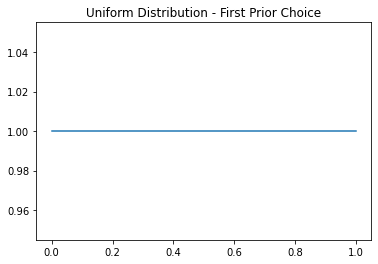

In [12]:
from scipy.stats import uniform

# Even though a uniform prior is pretty boring we'll still plot it to have a look

x = np.linspace(0,1,num=40)
uniform_prior = uniform.pdf(x)
plt.plot(x,uniform_prior)
plt.title('Uniform Distribution - First Prior Choice')
plt.show()

### Selecting the data generating process

In any analysis, we need to have a model which can be used to evaluate the question 'given my hypothesis, how likely is the data I see?' It takes knowledge of the problem to select the appropriate model for this data generation process.

Looking at our problem (estimating the % of water covering the earth) we can see each sample we draw has two possible outcomes (Land or Water). This sort of system can be described by the binomial distribution.



In [13]:
from scipy.stats import binom

# Evaluating the Likelihood


At a very basic level, you take a single p value (say 0.9), evaluate the likelihood using the binomial model. e.g. assuming the p value is 0.9, what is the probability I get 6 Waters from 10 samples?


In [14]:
x = binom.pmf(6, 10, 0.9)
print(f'Probability of obtaining this result, given a p value of 0.9  - {x}')

Probability of obtaining this result, given a p value of 0.9  - 0.011160260999999996


The answer, not very likely.


But evaluating a single estimate isn't where the problem is. The problems occur when you try to survey all possible values of p. How do you test the likelihood of lots of potential p values? There are two main approaches:

 - Grid approximation
 - Markov Chain Monte Carlo (MCMC)

### Grid Approximation

So we are attempting to determine what the p value is (between 0 and 1). So why dont we just loop between 0 and 1 (at some pre-determined resolution) and just check all the values? Thats what grid approximation does. Its not fancy but its effective!

Grid approximation has issues that prevent it from being used in more complex analyses which we'll discuss later.

In [15]:
# The finer the grid, the better estimate we'll get on our posterior - but it'll take more samples!

analysis_grid_course = np.linspace(0,1,num=5)
analysis_grid_medium = np.linspace(0,1,num=10)
analysis_grid_fine = np.linspace(0,1,num=40)

In [16]:

# use the grids to evaluate the likelihood using the binomial model

# This section asks 'Assuming we see 6 waters in 10 measurements - loop through the possible p values in the
# grid, and evaluate the likelihood

likelihood_course = binom.pmf(6, 10, analysis_grid_course)
likelihood_medium = binom.pmf(6, 10, analysis_grid_medium)
likelihood_fine = binom.pmf(6, 10, analysis_grid_fine)


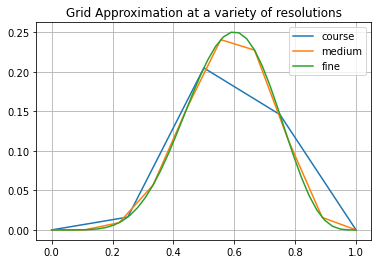

In [17]:
ax = plt.figure()
plt.plot(analysis_grid_course, likelihood_course, label = 'course')
plt.plot(analysis_grid_medium, likelihood_medium, label = 'medium')
plt.plot(analysis_grid_fine, likelihood_fine, label = 'fine')

plt.title('Grid Approximation at a variety of resolutions')
plt.legend()
plt.grid()
plt.show()

Just a reminder, this is the likelihood. We haven't combined this with our prior. Lets finish the calculation and explore the sensitivity of the solution to prior choice.

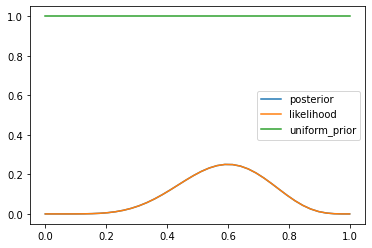

In [22]:
posterior_unnormalised = likelihood_fine * uniform_prior
x = np.linspace(0,1,num=40)
plt.plot(x,posterior_unnormalised, label = 'posterior')
plt.plot(x,likelihood_fine, label = 'likelihood')
plt.plot(x,uniform_prior, label = 'uniform_prior')
plt.legend()
plt.show()

Just remember - all of these are un-normalised. If we were doing a full analysis we would have to include the denominator of bayes formula - but for this example we'll just ignore it, and acknoweldge that we are working with not proper probability distributions

# Exploring the effect of Priors

In [23]:
from ipywidgets import interact
import ipywidgets as widgets

In [29]:
def prior_explore(a,b):

    from scipy.stats import beta
    import numpy as np
    import matplotlib.pyplot as plt
    
    #Prior
    beta_distribution = beta(a, b)
    x_vals = np.linspace(0, 1, num=40)
    p_vals = beta_distribution.pdf(x_vals)
    
    #likelihood
    analysis_grid_fine = np.linspace(0,1,num=40)
    likelihood_fine = binom.pmf(6, 10, analysis_grid_fine)
    
    # Posterior
    posterior = likelihood_fine *p_vals
    
    
    plt.plot(x_vals,p_vals, label='prior')
    plt.plot(x_vals,likelihood_fine, label='likelihood')
    plt.plot(x_vals,posterior, label='posterior')
    plt.xlim([0,1])
    
    plt.title('Exploring the effect of priors')
    plt.legend
    plt.show()

In [30]:
interact(prior_explore, a=5,b=5)

interactive(children=(IntSlider(value=5, description='a', max=15, min=-5), IntSlider(value=5, description='b',…

<function __main__.prior_explore(a, b)>